In [1]:
import numpy as np
import pandas as pd
from scipy import stats as stats
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
Ins = pd.read_csv("insurance.csv")
Ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [3]:
Ins.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
Ins.shape

(1338, 7)

#### In order to optimize the memory
1. Attributes 'age' & 'children' can be assigned to integer 32-bit as they won't need much space to store the values, 
2. Attributes 'sex', 'region' & 'smoker' can see be assigned to the data type 'category'  as the values expected are limited & repititive in nature

In [5]:
Ins['age'] = Ins['age'].astype('int32')
Ins['children'] = Ins['children'].astype('category')
Ins['sex'] = Ins['sex'].astype('category')
Ins['region'] = Ins['region'].astype('category')
Ins['smoker'] = Ins['smoker'].astype('category')

In [6]:
Ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int32
sex         1338 non-null category
bmi         1338 non-null float64
children    1338 non-null category
smoker      1338 non-null category
region      1338 non-null category
charges     1338 non-null float64
dtypes: category(4), float64(2), int32(1)
memory usage: 32.0 KB


#### We can see the memory usage has been reduced from 73.2 KB to 32.0 KB, which is almost 45% of the original dataset. In order to the optimize the model's performance, it is very important to use the right data types.

In [7]:
Ins.shape

(1338, 7)

In [8]:
Ins.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [9]:
#creating a function to determine missing values, applying on columns
def num_missing(x):
    return sum(x.isnull())

print ("Missing values per column:")
print (Ins.apply(num_missing, axis=0))

Missing values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [10]:
Ins.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### The minimum values for age & bmi are non-zeroes. So data set doesn't have missing values to filled or omitted.

In [11]:
Ins.describe(include='category').transpose()

,count,unique,top,freq
sex,1338,2,male,676
children,1338,6,0,574
smoker,1338,2,no,1064
region,1338,4,southeast,364


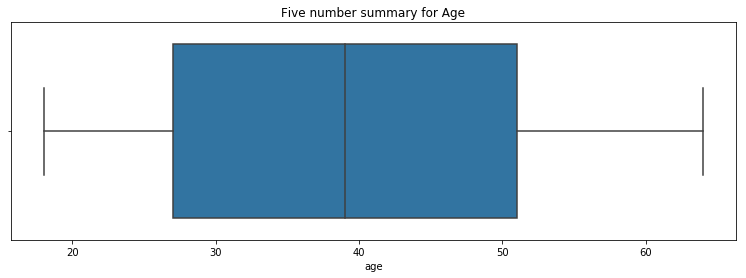

In [12]:
plt.figure(figsize=(13,4))
plt.title('Five number summary for Age')
sns.boxplot(x = 'age', data = Ins)

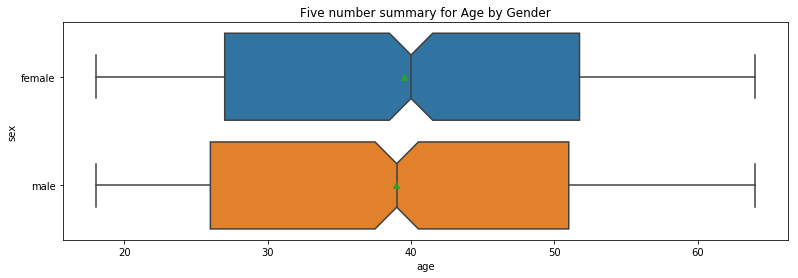

In [13]:
plt.figure(figsize=(13,4))
plt.title('Five number summary for Age by Gender')
sns.boxplot(x = 'age', data = Ins, y = 'sex', notch = True, showmeans = True)

Observation: 
1. There seems to be no outliers considering the Age in the distribution. It holds true for both the genders in the dataset. 
2. Out of the whole dataset, median age can be observed as 39. When the same is checked by gender, median age for male is 39 whereas the median age for females is 40.
3. Sometimes we need to check the summary to possible lowest level of details to understand the data set better.
4. Mean & Median age appears same for 'Male'

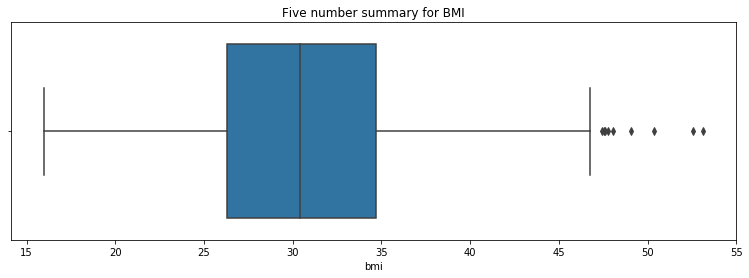

In [14]:
plt.figure(figsize=(13,4))
plt.title('Five number summary for BMI')
sns.boxplot(x = 'bmi', data = Ins)

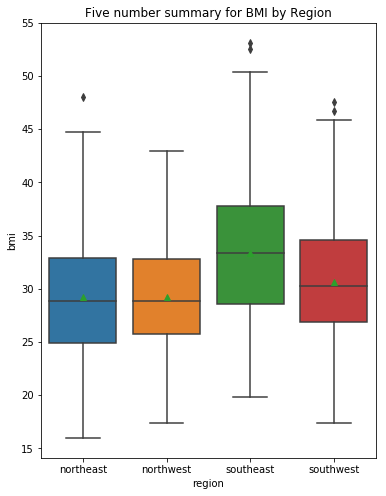

In [15]:
plt.figure(figsize=(6,8))
plt.title('Five number summary for BMI by Region')
sns.boxplot(y = 'bmi', data = Ins, x = 'region', showmeans = True)

Observation:
1. There seem to be around 7 outliers appearing the data which are beyond the maximum. There are no outliers in the lower end.
2. When we check the BMI 5 box summary by region, it can be seen that there are no outliers coming from 'northwest' region. 
3. Also outliers reported by region are 5 vs 7 out of the whole dataset. It is a perfect example how outliers can impact the model. In this case, there are high chances to distort the predcition for 'northwest' considering the whole data set.
4. It is important to eliminate the outliers to build a better model suited for all the regions.
5. There is no significant difference between Mean & Median BMI for all the regions.

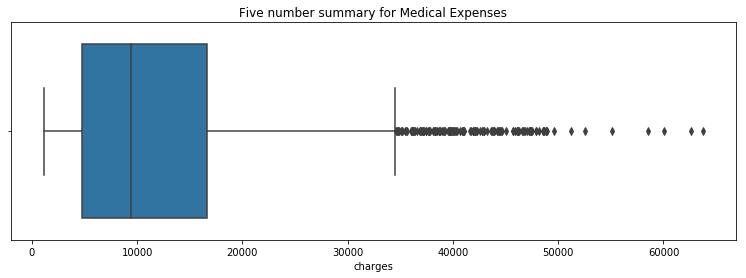

In [16]:
plt.figure(figsize=(13,4))
plt.title('Five number summary for Medical Expenses')
sns.boxplot(x = 'charges', data = Ins)

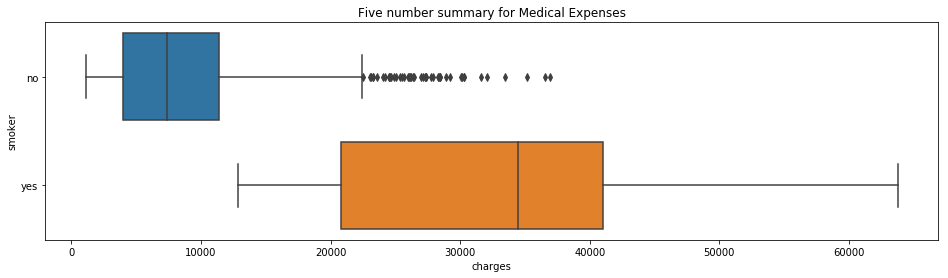

In [17]:
plt.figure(figsize=(16,4))
plt.title('Five number summary for Medical Expenses')
sns.boxplot(x = 'charges', y = 'smoker', data = Ins)

Observation:
1. Several outliers can observed considering the whole dataset. Surpirsingly all the outliers are appearing from non-smkers alone and can be seen in Out[42].
2. Minimum and maximum medcial expenses are significantly higher for smokers vs non-smokers.

So far, we have seen the separate boxplots for each varibale. We can also build a boxplot for all the variables in one go. Since the values are very much different from each variable, we won't be able to interpret the plot. The same can be interpreted by normalizing the values so that all the values fall between -1 & 1. This type of plot can be used to observe the outliers. You may see the same in the follwing lines of code:

In [18]:
age_norm = (Ins["age"]-Ins["age"].mean())/(Ins["age"].max()-Ins["age"].min())
bmi_norm = (Ins["bmi"]-Ins["bmi"].mean())/(Ins["bmi"].max()-Ins["bmi"].min())
charges_norm = (Ins["charges"]-Ins["charges"].mean())/(Ins["charges"].max()-Ins["charges"].min())
norm_plot = pd.DataFrame({'nAge':age_norm, 'nBMI':bmi_norm, 'nCharges':charges_norm})

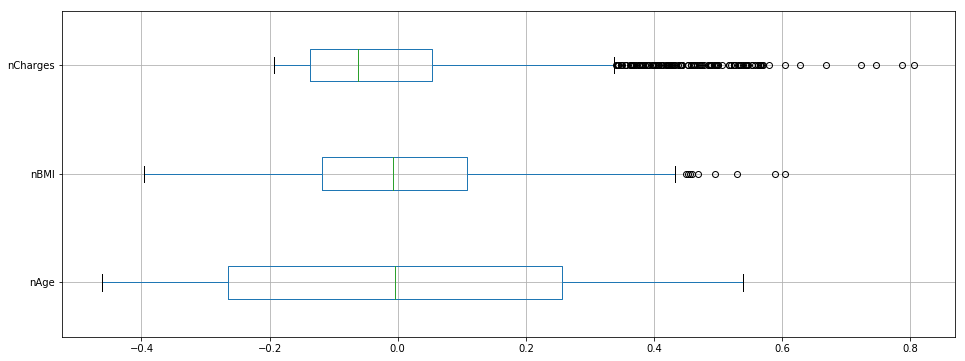

In [19]:
plt.figure(figsize=(16,6))
norm_plot.boxplot(vert = False)

The summary appears same as the initial plots for each variable. We can observe the outliers in BMI and Charges. There are no outliers in age. This kind of plot is useful to take a quick look at the data. However, it will be difficult to draw further observations or specific values such as median or quartiles.

In [20]:
print("Skewness of BMI:",stats.skew(Ins["bmi"]))
print("Skewness of Age:",stats.skew(Ins["age"]))
print("Skewness of Charges:",stats.skew(Ins["charges"]))

Skewness of BMI: 0.28372857291709386
Skewness of Age: 0.055610083072599126
Skewness of Charges: 1.5141797118745743


Mean of BMI: 30.663396860986538
Variance of BMI: 37.187883609773266
Std Dev of BMI: 6.098186911679017
Skewness of BMI: 0.28372857291709386


(array([ 13.,  17.,  47.,  80., 103., 131., 162., 157., 145., 143., 105.,
         90.,  54.,  42.,  20.,  12.,  10.,   4.,   1.,   2.]),
 array([15.96  , 17.8185, 19.677 , 21.5355, 23.394 , 25.2525, 27.111 ,
        28.9695, 30.828 , 32.6865, 34.545 , 36.4035, 38.262 , 40.1205,
        41.979 , 43.8375, 45.696 , 47.5545, 49.413 , 51.2715, 53.13  ]),
 <a list of 20 Patch objects>)

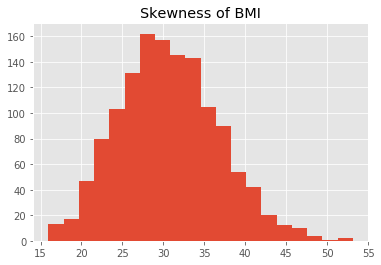

In [21]:
print("Mean of BMI:",Ins["bmi"].mean())
print("Variance of BMI:",Ins["bmi"].var())
print("Std Dev of BMI:",Ins["bmi"].std())
print("Skewness of BMI:",stats.skew(Ins["bmi"]))
plt.style.use('ggplot')
plt.title("Skewness of BMI")
plt.hist(Ins["bmi"],bins = 20)

Mean of Age: 39.20702541106129
Variance of Age: 197.40138665754424
Std Dev of Age: 14.049960379216172
Skewness of Age: 0.055610083072599126


(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <a list of 10 Patch objects>)

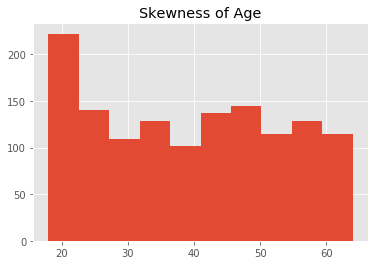

In [22]:
print("Mean of Age:",Ins["age"].mean())
print("Variance of Age:",Ins["age"].var())
print("Std Dev of Age:",Ins["age"].std())
print("Skewness of Age:",stats.skew(Ins["age"]))
plt.style.use('ggplot')
plt.title("Skewness of Age")
plt.hist(Ins["age"],bins = 10)

Mean of Charges: 13270.422265141257
Variance of Charges: 146652372.1528548
Std Dev of Charges: 12110.011236693994
Skewness of Charges: 1.5141797118745743


(array([287., 249., 205., 193.,  71.,  58.,  46.,  40.,  25.,  10.,  25.,
         34.,  30.,  27.,  22.,  10.,   1.,   1.,   2.,   2.]),
 array([ 1121.8739   ,  4254.3016055,  7386.729311 , 10519.1570165,
        13651.584722 , 16784.0124275, 19916.440133 , 23048.8678385,
        26181.295544 , 29313.7232495, 32446.150955 , 35578.5786605,
        38711.006366 , 41843.4340715, 44975.861777 , 48108.2894825,
        51240.717188 , 54373.1448935, 57505.572599 , 60638.0003045,
        63770.42801  ]),
 <a list of 20 Patch objects>)

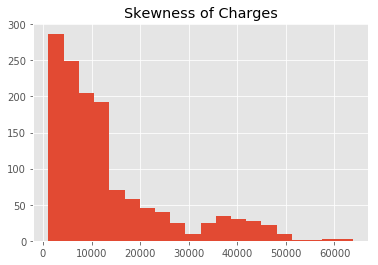

In [23]:
print("Mean of Charges:",Ins["charges"].mean())
print("Variance of Charges:",Ins["charges"].var())
print("Std Dev of Charges:",Ins["charges"].std())
print("Skewness of Charges:",stats.skew(Ins["charges"]))
plt.style.use('ggplot')
plt.title("Skewness of Charges")
plt.hist(Ins["charges"],bins = 20)

Observations:
1. Age: Maximum number of occurences are in the range of 20-24. Rest of the ages are more or less evenly distributed.
2. BMI: Maximum number of occurences are in the range of 27-31 followed by 31-34, 24-27, 34-38, 19-24, 38-42 and so on.
3. Charges: Maximum number of occurences are for the people spending less than 10000 towards medical expenses.
4. BMI skewness is inclined towards right and Age & Charges are inclined towards left.

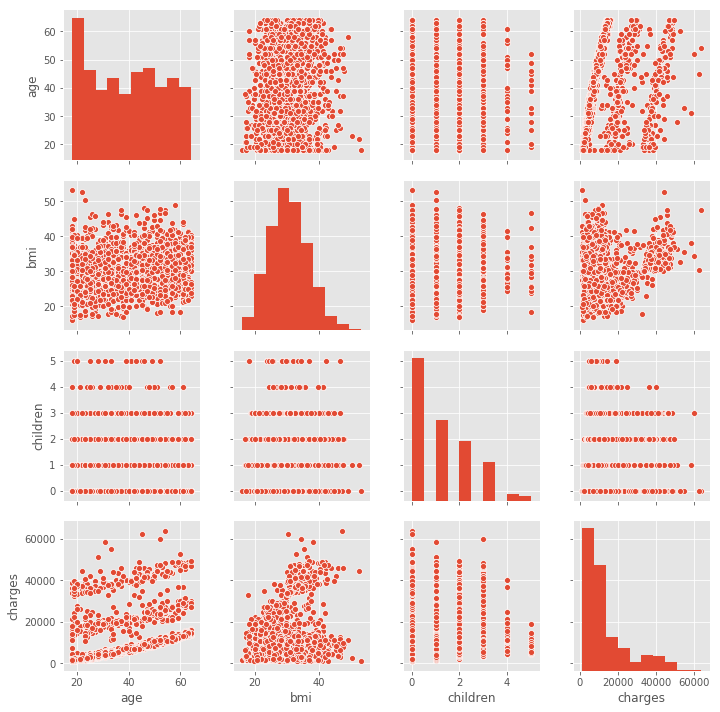

In [24]:
sns.pairplot(Ins)

In [28]:
Ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Q: Do charges of people who smoke differ significantly from the people who don't smoke?
Solution:
1. Filter out the charges for smokers & non-smokers
2. Formulate Hypothesis:
    a. H0 = Charges for smokers & non-smokers are same
    b. Ha = Charges for smokers & non-smokers are not same
3. Find out the pvalue by using t-statistic

In [64]:
S_Y = Ins.loc[(Ins["smoker"] == 'yes')]
S_N = Ins.loc[(Ins["smoker"] == 'no')]
a = S_Y["charges"]
b = S_N["charges"]
print(a.head())
print(b.head())

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64


In [93]:
stats.ttest_ind(a,b)

Ttest_indResult(statistic=0.5287417244545299, pvalue=0.5972482399659257)

Decision: Since pvalue is far less than 0.05, H0 can be rejected. We can infer that charges of smokers and non-smokers are significantly different.

Q: Does bmi of males differ significantly from that of females?
Solution:
1. Filter out the BMI for males & females
2. Formulate Hypothesis:
    a. H0 : Gender has no impact on BMI
    b. Ha : Gender has impact on BMI
3. Find out pvalue

In [94]:
M_B = Ins.loc[(Ins["sex"] == 'male')]
F_B = Ins.loc[(Ins["sex"] == 'female')]
a = M_B["bmi"]
b = F_B["bmi"]
print(a.head())
print(b.head())

1    33.770
2    33.000
3    22.705
4    28.880
8    29.830
Name: bmi, dtype: float64
0    27.90
5    25.74
6    33.44
7    27.74
9    25.84
Name: bmi, dtype: float64


In [95]:
stats.ttest_ind(a,b)

Ttest_indResult(statistic=1.696752635752224, pvalue=0.08997637178984932)

Since pvalue is greater than 0.05, we accept H0 (Gender has no impact on BMI).

Q: Is the proportion of smokers significantly different in different genders?
Solution:
1. Create a cross tab populations counts as both are categorical variables.
2. Formulate Hypothesis:
    a. H0: Smoking habits doesn't differ by gender
    b. Ha: Smoking habits differ by gender
3. Calculate Chi2 & pvalues from the observed frequencies

In [96]:
a = pd.crosstab(Ins["smoker"],Ins["sex"])
a

sex,female,male
smoker,,
no,547,517
yes,115,159


In [97]:
stats.chi2_contingency(a)

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 537.56651719],
        [135.56651719, 138.43348281]]))

Since pvalue is less than 0.05, H0 can be rejected. We can infer smoking habits differ by Gender.

Q: Is the distribution of bmi across women with no children, one child and two children, the same ?
Solution:
1. Filter out the BMI values for women with no children, 1 child & 2 children.
2. Formulate hypothesis:
    a. H0: BMI distribution differ across women with no children, 1 child & 2 children.
    b. Ha: BMI distribution doesn't differ across women with no children, 1 child & 2 children.
3. Calculate pvalue for oneway F-statistic(ANOVA).

In [99]:
F_0C = Ins.loc[(Ins["children"] == 0) & (Ins["sex"] == 'female')]
F_1C = Ins.loc[(Ins["children"] == 1) & (Ins["sex"] == 'female')]
F_2C = Ins.loc[(Ins["children"] == 2) & (Ins["sex"] == 'female')]
a = F_0C["bmi"]
b = F_1C["bmi"]
c = F_2C["bmi"]
print(a.head())
print(b.head())
print(c.head())

0     27.90
5     25.74
9     25.84
11    26.29
13    39.82
Name: bmi, dtype: float64
6     33.44
16    30.78
21    32.40
23    31.92
58    22.88
Name: bmi, dtype: float64
27    32.775
41    36.630
43    30.800
46    38.665
51    33.630
Name: bmi, dtype: float64


In [100]:
stats.f_oneway(a,b,c)

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

Since pvalue is greater than 0.05, we fail to reject H0. We can infer BMI distribution doesn't differ across women with no children, 1 child & 2 children.